<p>All the necessary code blocks used to achieve the best resulting fully connected DNN for this classification problem.</p>
<ul>
    <li>SELECTING BEST ARCHITECTURE</li>
    <li>SELECTING BEST ACTIVATION FUNCTION</li>
    <li>SELECTING BEST OPTIMIZATION</li>
    <li>SELECTING BEST LEARNING RATE AND DROP OUT</li>
</ul>

# CODE BLOCKS TO GET BEST ACTIVATION FUNCTION FOR OUR MODEL

<p>In this part we are trying  6 different activation functions and the final summary is reported in CM3</p>

### PREPARATION OF DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

from numpy.random import seed
seed(20)
tf.random.set_seed(13)

In [3]:
dataset = pd.read_csv("COVID_dataset_train.csv")

In [4]:
# replacing NaN in Outbreak_Related with NO 
dataset['Outbreak_Related'] = dataset['Outbreak_Related'].fillna("No") 

# Dropping NaN values in Age_Group, Test_reported_date and specimen_date
dataset = dataset.dropna()

In [5]:
dataset.Accurate_Episode_Date = pd.to_datetime(dataset.Accurate_Episode_Date)
dataset.Case_Reported_Date = pd.to_datetime(dataset.Case_Reported_Date)
dataset.Test_Reported_Date = pd.to_datetime(dataset.Test_Reported_Date)
dataset.Specimen_Date = pd.to_datetime(dataset.Specimen_Date)

dataset = dataset.drop(['Test_Reported_Date', 'Specimen_Date'],axis=1)

In [6]:
dataset.Case_Reported_Date = list(map(lambda x: x.timestamp(),dataset.Case_Reported_Date))
dataset.Accurate_Episode_Date = list(map(lambda x: x.timestamp(),dataset.Accurate_Episode_Date))

In [7]:
## encoding of target variable
dataset_target = dataset['Outcome1']
dataset_target = pd.DataFrame(dataset_target, columns = ['Outcome1'])

categorical_cols = ['Outcome1']

# Create the encoder.
encoder_1 = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)

# Fit and transform encoder to X
array_hot_encoded_1 = encoder_1.fit_transform(dataset_target)

# convert it to a Data Frame
data_hot_encoded_1 = pd.DataFrame(array_hot_encoded_1, index=dataset_target.index)

# set column names of encoded dataframe
data_hot_encoded_1.columns = encoder_1.get_feature_names(categorical_cols)

dataset_target_1 = data_hot_encoded_1

In [8]:
## encoding of features
dataset_features = dataset.drop(['Outcome1'], axis = 1)

dataset_features['Age_Group'] = dataset_features['Age_Group'].replace({'<20': 1, '20s': 2, '30s': 3 , '40s': 4, '50s': 5, '60s': 6, '70s': 7, '80s': 8, '90s': 9})

categorical_cols = ['Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Outbreak_Related']

# Create the encoder.
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)

# Fit and transform encoder to X
array_hot_encoded = encoder.fit_transform(dataset_features[categorical_cols])

# convert it to a Data Frame
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dataset.index)

# set column names of encoded dataframe
data_hot_encoded.columns = encoder.get_feature_names(categorical_cols)

# concatenate other columns with the encoded columns to get the final datset
data_other_cols = dataset_features.drop(columns=categorical_cols)
dataset_temp = pd.concat([data_hot_encoded, data_other_cols], axis=1)
dataset_features = dataset_temp

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset_features, dataset_target_1, test_size = 0.10, random_state = 360)

In [10]:
# X_train = dataset_features
# y_train = dataset_target_1

In [11]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Reporting_PHU_Longitude', 'Reporting_PHU_Latitude','Case_Reported_Date', 'Accurate_Episode_Date']

sc = StandardScaler()

X_train_scaled = X_train.copy()


X_train_scaled[numeric_columns] = sc.fit_transform(X_train[numeric_columns])


In [12]:
X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = sc.transform(X_test[numeric_columns])

## ACTIVATION FUNCTION 1: RELU

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

# INITIALING ANN
ann = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units = 112, activation='relu'))
ann.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=448, activation='relu', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=56, activation='relu'))

# ADDING OUTPUT LAYER
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model = ann.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.8213 - val_loss: 0.4183 - val_accuracy: 0.8706
Epoch 2/400
351/351 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8782 - val_loss: 0.3532 - val_accuracy: 0.8938
Epoch 3/400
351/351 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8871 - val_loss: 0.3303 - val_accuracy: 0.8928
Epoch 4/400
351/351 [==============================] - 0s 1ms/step - loss: 0.32

In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 112)               5824      
_________________________________________________________________
dropout (Dropout)            (None, 112)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 448)               50624     
_________________________________________________________________
dense_2 (Dense)              (None, 56)                25144     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 171       
Total params: 81,763
Trainable params: 81,763
Non-trainable params: 0
_________________________________________________________________


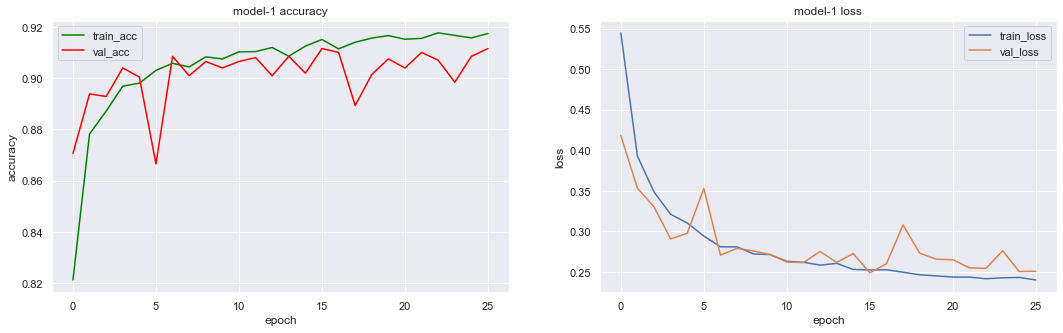

In [15]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model.history['loss'], label = 'train_loss')
plt.plot(fitted_model.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [16]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val acc: 0.9012600114712348
Mean val loss: 0.2839101558694473
Mean train acc: 0.9051691614664518
Mean train loss: 0.2813888421425453


In [17]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train = ann.predict(X_test_scaled)

pred_values_train= []
for result in results_train:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score
score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 1: ", score)

test accuracy for model 1:  0.9058020477815699


## ACTIVATION FUNCTION 2: SIGMOID

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

# INITIALING ANN
ann_2 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units = 112, activation='sigmoid'))
ann_2.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=448, activation='sigmoid', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=56, activation='sigmoid'))

# ADDING OUTPUT LAYER
ann_2.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_2 = ann_2.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 3ms/step - loss: 0.8393 - accuracy: 0.6364 - val_loss: 0.6155 - val_accuracy: 0.7801
Epoch 2/400
351/351 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.82 - 1s 2ms/step - loss: 0.5194 - accuracy: 0.8307 - val_loss: 0.4718 - val_accuracy: 0.8180
Epoch 3/400
351/351 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.8542 - val_loss: 0.4576 - val_accuracy: 0.8220
Epoch 4/400
351/351 [================

In [20]:
ann_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 112)               5824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 448)               50624     
_________________________________________________________________
dense_6 (Dense)              (None, 56)                25144     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 171       
Total params: 81,763
Trainable params: 81,763
Non-trainable params: 0
_________________________________________________________________


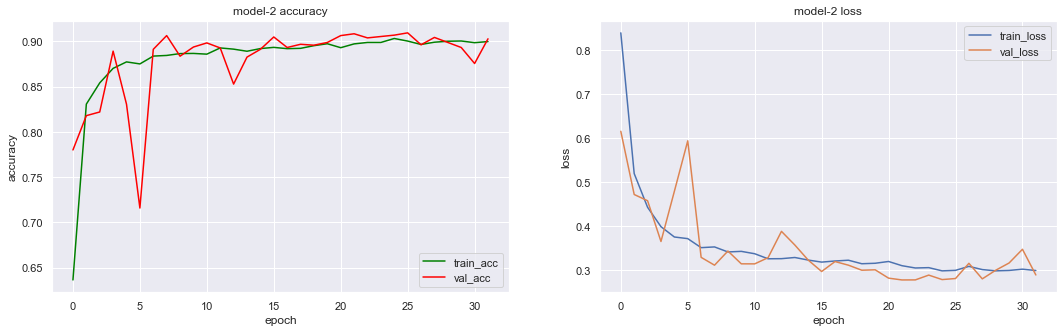

In [21]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_2.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_2.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-2 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_2.history['loss'], label = 'train_loss')
plt.plot(fitted_model_2.history['val_loss'], label = 'val_loss')
plt.title('model-2 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [22]:
print("Mean val acc:", np.mean(fitted_model_2.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_2.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_2.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_2.history['loss']))

Mean val acc: 0.8797396328300238
Mean val loss: 0.345234889537096
Mean train acc: 0.8810983076691628
Mean train loss: 0.3502652971073985


In [23]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train = ann_2.predict(X_test_scaled)

pred_values_train= []
for result in results_train:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 2: ", score)

test accuracy for model 2:  0.8832764505119454


## ACTIVATION FUNCTION 3: TANH

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

# INITIALING ANN
ann_3 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_3.add(tf.keras.layers.Dense(units = 112, activation='tanh'))
ann_3.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann_3.add(tf.keras.layers.Dense(units=448, activation='tanh', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann_3.add(tf.keras.layers.Dense(units=56, activation='tanh'))

# ADDING OUTPUT LAYER
ann_3.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_31 = ann_3.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 3ms/step - loss: 0.5719 - accuracy: 0.8347 - val_loss: 0.4828 - val_accuracy: 0.8701
Epoch 2/400
351/351 [==============================] - 1s 2ms/step - loss: 0.4265 - accuracy: 0.8797 - val_loss: 0.3942 - val_accuracy: 0.8847
Epoch 3/400
351/351 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8887 - val_loss: 0.3503 - val_accuracy: 0.8822
Epoch 4/400
351/351 [==============================] - 1s 1ms/step - loss: 0.33

In [26]:
ann_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 112)               5824      
_________________________________________________________________
dropout_2 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 448)               50624     
_________________________________________________________________
dense_10 (Dense)             (None, 56)                25144     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 171       
Total params: 81,763
Trainable params: 81,763
Non-trainable params: 0
_________________________________________________________________


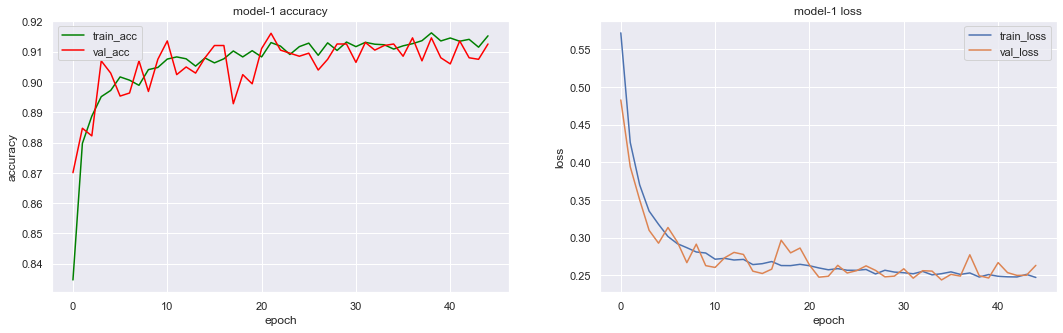

In [27]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_31.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_31.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_31.history['loss'], label = 'train_loss')
plt.plot(fitted_model_31.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [28]:
print("Mean val acc:", np.mean(fitted_model_31.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_31.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_31.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_31.history['loss']))

Mean val acc: 0.9057072281837464
Mean val loss: 0.27448501123322383
Mean train acc: 0.9065326253573099
Mean train loss: 0.27733223934968315


In [29]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_31 = ann_3.predict(X_test_scaled)

pred_values_train= []
for result in results_train_31:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 3: ", score)

test accuracy for model 3:  0.9010238907849829


## ACTIVATION FUNCTION 4: LEAKY RELU AT ALPHA (0.01)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
leaky_relu = LeakyReLU(alpha=0.01)

# INITIALING ANN
ann_4 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units = 112, activation = leaky_relu))
ann_4.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=448, activation = leaky_relu, kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=56, activation = leaky_relu))

# ADDING OUTPUT LAYER
ann_4.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_4 = ann_4.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.8206 - val_loss: 0.4069 - val_accuracy: 0.8777
Epoch 2/400
351/351 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8775 - val_loss: 0.3633 - val_accuracy: 0.8852
Epoch 3/400
351/351 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8900 - val_loss: 0.3265 - val_accuracy: 0.8933
Epoch 4/400
351/351 [==============================] - 1s 2ms/step - loss: 0.32

In [32]:
ann_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 112)               5824      
_________________________________________________________________
dropout_3 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 448)               50624     
_________________________________________________________________
dense_14 (Dense)             (None, 56)                25144     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 171       
Total params: 81,763
Trainable params: 81,763
Non-trainable params: 0
_________________________________________________________________


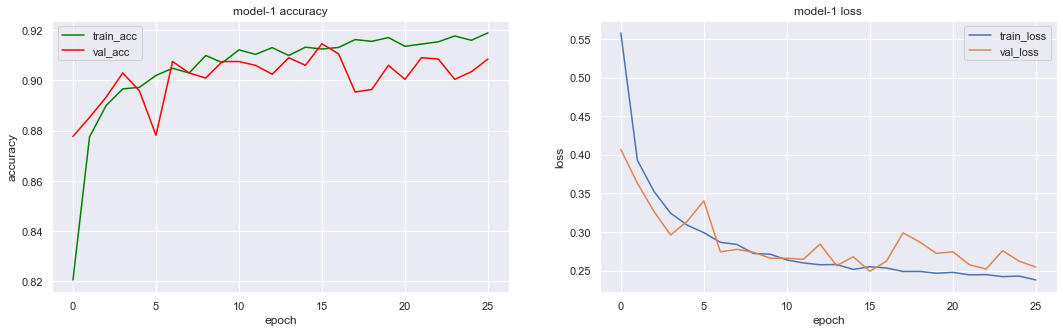

In [33]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_4.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_4.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_4.history['loss'], label = 'train_loss')
plt.plot(fitted_model_4.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [34]:
print("Mean val acc:", np.mean(fitted_model_4.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_4.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_4.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_4.history['loss']))

Mean val acc: 0.9013766806859237
Mean val loss: 0.28549065039708066
Mean train acc: 0.9052652602012341
Mean train loss: 0.28275744445048845


In [35]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_4 = ann_4.predict(X_test_scaled)

pred_values_train= []
for result in results_train_4:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 4: ", score)

test accuracy for model 4:  0.9058020477815699


## ACTIVATION FUNCTION 5: ELU

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

# INITIALING ANN
ann_5 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_5.add(tf.keras.layers.Dense(units = 112, activation = 'elu'))
ann_5.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann_5.add(tf.keras.layers.Dense(units=448, activation = 'elu', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann_5.add(tf.keras.layers.Dense(units=56, activation = 'elu'))

# ADDING OUTPUT LAYER
ann_5.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_5 = ann_5.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 3ms/step - loss: 0.5743 - accuracy: 0.8341 - val_loss: 0.4480 - val_accuracy: 0.8847
Epoch 2/400
351/351 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8804 - val_loss: 0.4002 - val_accuracy: 0.8888
Epoch 3/400
351/351 [==============================] - 1s 2ms/step - loss: 0.3700 - accuracy: 0.8945 - val_loss: 0.3446 - val_accuracy: 0.8837
Epoch 4/400
351/351 [==============================] - 1s 2ms/step - loss: 0.34

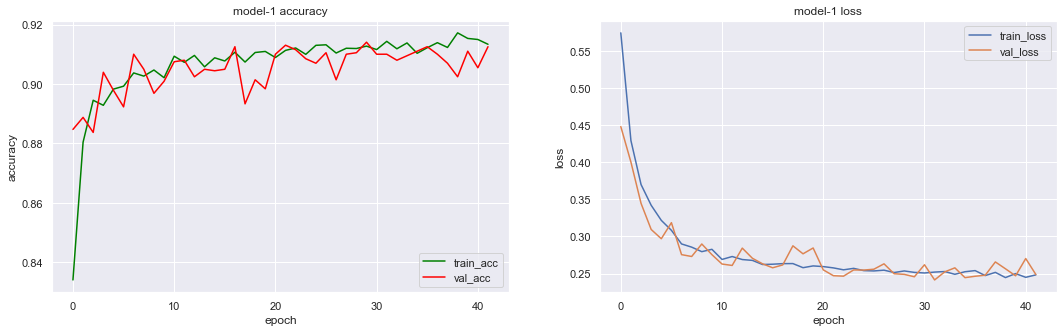

In [38]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_5.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_5.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_5.history['loss'], label = 'train_loss')
plt.plot(fitted_model_5.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [39]:
print("Mean val acc:", np.mean(fitted_model_5.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_5.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_5.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_5.history['loss']))

Mean val acc: 0.904954500141598
Mean val loss: 0.27391174080825986
Mean train acc: 0.906605988740921
Mean train loss: 0.278056705281848


In [40]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_5 = ann_5.predict(X_test_scaled)

pred_values_train= []
for result in results_train_5:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 5: ", score)

test accuracy for model 5:  0.9010238907849829


## ACTIVATION FUNCTION 6: SELU

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

# INITIALING ANN
ann_6 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_6.add(tf.keras.layers.Dense(units = 112, activation='selu', kernel_initializer='lecun_normal'))
ann_6.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann_6.add(tf.keras.layers.Dense(units=448, activation='selu', kernel_initializer='lecun_normal', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann_6.add(tf.keras.layers.Dense(units=56, activation='selu', kernel_initializer='lecun_normal'))

# ADDING OUTPUT LAYER
ann_6.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_6 = ann_6.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 3ms/step - loss: 0.8436 - accuracy: 0.8280 - val_loss: 0.7032 - val_accuracy: 0.8605
Epoch 2/400
351/351 [==============================] - 1s 2ms/step - loss: 0.6275 - accuracy: 0.8711 - val_loss: 0.5720 - val_accuracy: 0.8787
Epoch 3/400
351/351 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.8881 - val_loss: 0.4881 - val_accuracy: 0.8782
Epoch 4/400
351/351 [==============================] - 1s 2ms/step - loss: 0.43

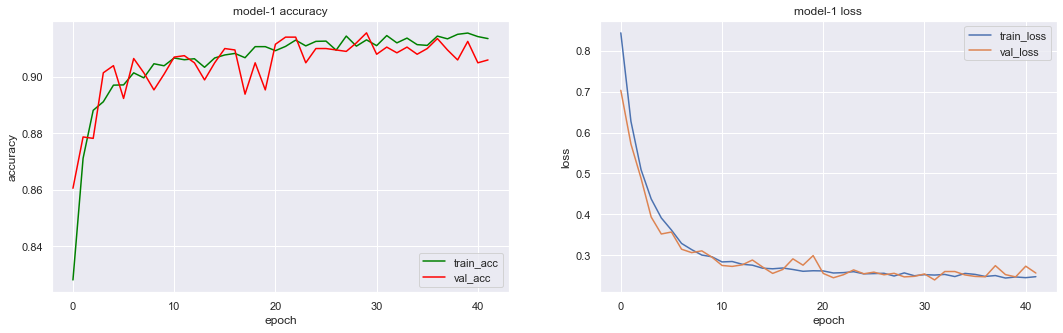

In [43]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_6.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_6.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_6.history['loss'], label = 'train_loss')
plt.plot(fitted_model_6.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [44]:
print("Mean val acc:", np.mean(fitted_model_6.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_6.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_6.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_6.history['loss']))

Mean val acc: 0.9041600440229688
Mean val loss: 0.29696079591910046
Mean train acc: 0.9055309820742834
Mean train loss: 0.302066812203044


In [45]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_6 = ann_6.predict(X_test_scaled)

pred_values_train= []
for result in results_train_6:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(y_test, pred_values_train)
print("test accuracy for model 6: ", score)

test accuracy for model 6:  0.8962457337883959


<P>Final comparison of results and run time performance are reported in a tabular form in CM3</P>